                                                                                        Created by Maria Dobko

# Part II: Simple linear regression

In [2]:
n <- 5   #my id-number

x <- c()
y <- c()
i = 50  # number of X  (Xi)
iter = 1
for (k in 2:50){
    x[k-1] <- 10* (1+ cos(k*n))
    y[k-1] <- sin(n+cos(k^2)) + cos(n+sin(k^2)/k)*(1+sin(k^2)/k)*x[k-1]
    
}

Generated data doesn't contain outliers, however, if we generate from k=1:50, then the first element will be an outlier, as y will be equal to 20, while other y are less than 5.

In [3]:
f = y ~ x
linear_model = lm(formula=f)
length(x)
length(y)
x
y

[1] 49

[1] 49

[1]  1.609284709  2.403120871 14.080820618 19.912028119 11.542514499
 [6]  0.963077949  3.330619383 15.253219888 19.649660285 10.221267563
[11]  0.475870196  4.375461488 16.333192031 19.217512697  8.896127562
[16]  0.156233566  5.519263839 17.301735610 18.623188723  7.590409508
[21]  0.009791867  6.741901948 18.141809705 17.877145121  6.327086695
[26]  0.039121649  8.021864260 18.838633737 16.992508065  5.128386502
[31]  0.243706872  9.336630637 19.379947521 15.984842190  4.015399309
[36]  0.619947988 10.663068584 19.756226979 14.871876750  3.007707433
[41]  1.161225268 11.977840252 19.960851709 13.673193677  2.123040584
[46]  1.858015277 13.257813055 19.990221465 12.409883053

[1] -1.02445009  0.31510462  2.01220080  4.71700761  0.18822931 -0.70650843
 [7]  0.67719420  2.57770855  3.97086934  3.14749973 -0.28902596  0.53124457
[13]  5.24570413  3.23922852  0.89268762 -0.23573821  0.60422372  4.44479543
[19]  3.35422445  1.79664009 -0.29462681  1.45943192  3.34993304  4.46127755
[25]  0.79014927 -0.27888331  1.03668930  4.05749590  4.59953278  1.05910017
[31] -0.22390045  1.98181075  5.13769768  4.10762402  0.29839519 -0.35288006
[37]  1.95683945  5.50952290  2.90123888  0.05445948 -0.66454490  2.75042190
[43]  5.52137602  3.25121963 -0.36500547 -0.31527134  2.44545369  5.47848043
[49]  2.82163978

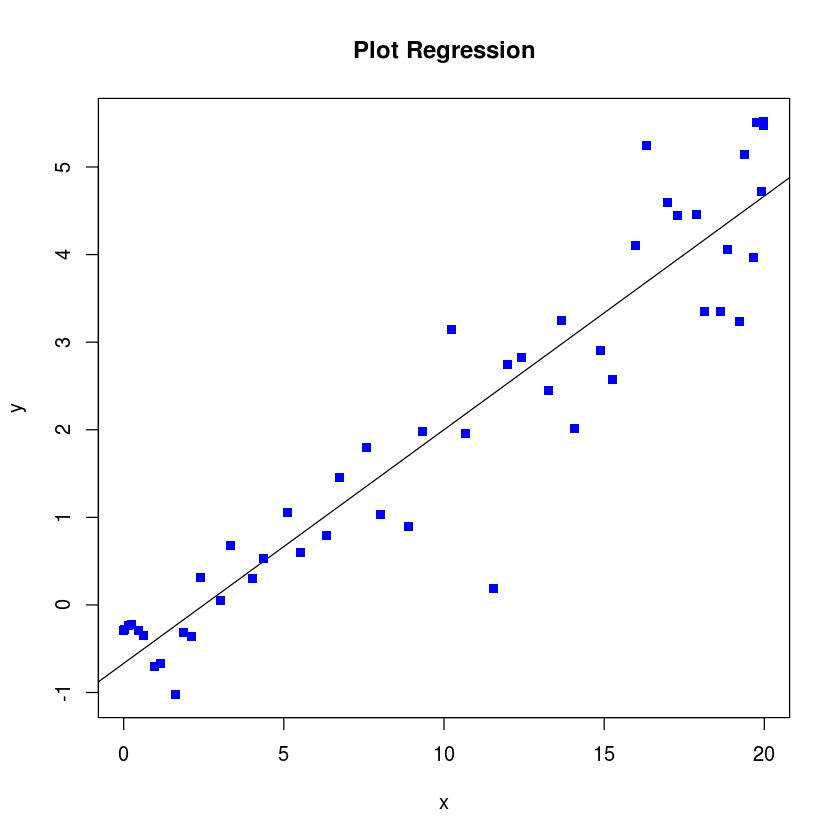

In [4]:
plot(x,y,col = "blue",main = "Plot Regression",
abline(lm(y~x)),pch = 15)

In [5]:
#linear_model.coefficients
summary(linear_model)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-0.6670920,0.16755932,-3.981229,2.363509e-04
x,0.2667698,0.01368526,19.493231,3.693111e-24


In [6]:
anova(linear_model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
x,1,174.23725,174.2372511,379.9861,3.693111e-24
Residuals,47,21.55119,0.4585359,NA,NA


In [7]:
summary(linear_model)


Call:
lm(formula = f)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2239 -0.3072  0.1488  0.3782  1.5556 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.66709    0.16756  -3.981 0.000236 ***
x            0.26677    0.01369  19.493  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6772 on 47 degrees of freedom
Multiple R-squared:  0.8899,	Adjusted R-squared:  0.8876 
F-statistic:   380 on 1 and 47 DF,  p-value: < 2.2e-16


### a) Find estimate â, b̂, σ̂ 2 of the parameters a, b and σ^2

In [8]:
x_bar = sum(x)/i
y_bar = sum(y)/i
x_bar
y_bar

[1] 9.797286

[1] 1.95987

In [9]:
# ESTIMATE FOR b
estim_b = sum((x-x_bar)*(y-y_bar))/sum((x-x_bar)^2)
print(estim_b)
# SAME IN THE TABLE OF COEFFICIENTS

[1] 0.2667165


In [10]:
#ESTIMATE FOR a
estim_a = y_bar - estim_b*x_bar
print(estim_a)

[1] -0.6532275


In [11]:
#ESTIMATE OF VARIANCE
variance = sum((x-x_bar)^2)
estim_var = variance/i
print(variance)
print(estim_var)

[1] 2450.275
[1] 49.0055


### b) Test the hypothesis H 0 : b = 0 vs the general alternative

b - This is the SLOPE of the regression line. Thus this is the amount that the Y variable (dependent) will change for each 1 unit change in the X variable

Critical value: a t-value based on n-2 degrees of freedom. Also divide alpha by 2 because it is a 2-tailed test. In this case n = 50  thus n-2 = 48 . With alpha = .05 we have alpha/2 = .025 and then t =  (from t-table).

Calculated Value: t = b/s(b) ,  s(b) is the standard error of b and is given in the problem

Compare: t-calc < t-crit and thus accept H0.

In [13]:
ttest <- t.test(x,y, mu = 0, paired = FALSE, var.equal = FALSE, conf.level = 0.95)
ttest


	Welch Two Sample t-test

data:  x and y
t = 7.5427, df = 55.628, p-value = 4.56e-10
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  5.873053 10.121673
sample estimates:
mean of x mean of y 
 9.997231  1.999868 


### c) Find the determination coefficient r^2 and comment on whether the linear model is adequate

In [14]:
r_sq <- summary(linear_model)$r.squared 
r_perc <- r_sq*100
sprintf("R-square is: %s , or : %s percents", r_sq, ceiling(r_perc))

[1] "R-square is: 0.889926148445525 , or : 89 percents"

R-squared = Explained variation / Total variation

R-squared is always between 0 and 100%:

0% indicates that the model explains none of the variability of the response data around its mean.

100% indicates that the model explains all the variability of the response data around its mean.


### d) Find the confidence interval for Y at x = 0 and x = 20

In [15]:
# FOR x=0 : cos(k*5)= -1  k~0.6
x[50] <- 0
y[50] <- sin(5+cos(1^2))

pr <- predict(linear_model,0, level = 0.9, interval = "confidence") 
tail(pr, 2) # the first row in the given table is for x = 0

,fit,lwr,upr
49,2.643491,2.4719802,2.8150011
50,-0.667092,-0.9482443,-0.3859397


In [16]:
#FOR x=20: 10(1+cos(5k)) = 20  cos(5k) = 1
x[51] <- 20
y[51] <- sin(n+cos(1^2)) + cos(n+sin(1^2)/1)*(1+sin(1^2)/1)*20

pred <- predict(linear_model,0, level = 0.9, interval = "confidence") 
tail(pred, 1)

,fit,lwr,upr
51,4.668305,4.387049,4.949561
